In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Loan_prediction/train_ctrUa4K.csv')
df_test= pd.read_csv('/content/drive/MyDrive/Loan_prediction/test_lAUu6dG.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **Handling Missing Data**

In [5]:
df['Dependents'] = df['Dependents'].replace('3+',3)
df_test['Dependents'] = df_test['Dependents'].replace('3+',3)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df['Dependents'] = df['Dependents'].astype(float)
df_test['Dependents'] = df_test['Dependents'].astype(float)

In [8]:
df.fillna(value=df.mean(), inplace=True)
df_test.fillna(value=df_test.mean(), inplace = True)

In [9]:
for col in df.columns:
  if(df[col].dtypes == 'object'):
    df = df.fillna(df[col].value_counts().index[0])

for col in df_test.columns:
  if(df_test[col].dtypes == 'object'):
    df_test = df_test.fillna(df_test[col].value_counts().index[0])

# **Scaling Data**

In [10]:
df['merge_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
# df['load'] = ((df['LoanAmount']*1000/ df['Loan_Amount_Term']))/df['merge_income']


df_test['merge_income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
# df_test['load'] = ((df_test['LoanAmount']*1000/ df_test['Loan_Amount_Term']))/df_test['merge_income']

In [11]:
df = df.drop(columns=['Loan_ID','ApplicantIncome', 'CoapplicantIncome'], axis=1)
df.head()

df_test = df_test.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [12]:
test_loan_id = df_test['Loan_ID']
df_test = df_test.drop(columns=['Loan_ID'], axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder
Lr = LabelEncoder()
for col in df.columns:
  if(df[col].dtypes == 'object'):
    df[col] = Lr.fit_transform(df[col])


for col in df_test.columns:
  if(df_test[col].dtypes == 'object'):
    df_test[col] = Lr.fit_transform(df_test[col])

In [14]:
y = df['Loan_Status']
X= df.drop( columns = ['Loan_Status'])


**Distributions of Features**

In [15]:
X.dtypes

Gender                int64
Married               int64
Dependents          float64
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
merge_income        float64
dtype: object

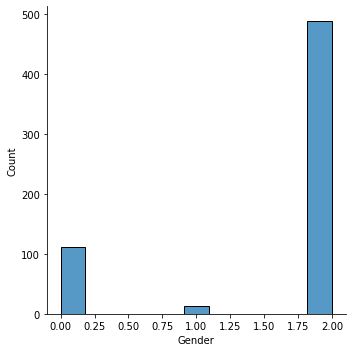

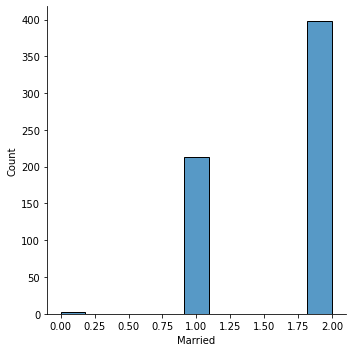

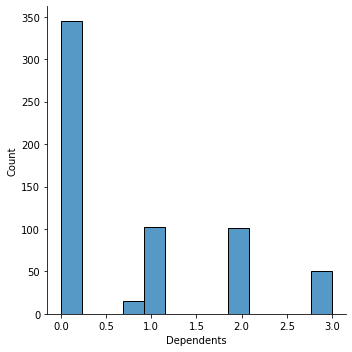

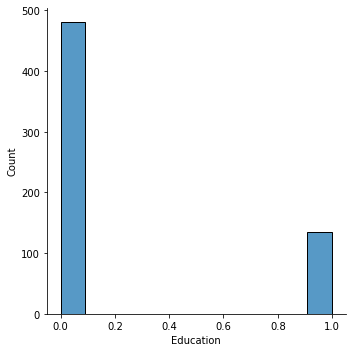

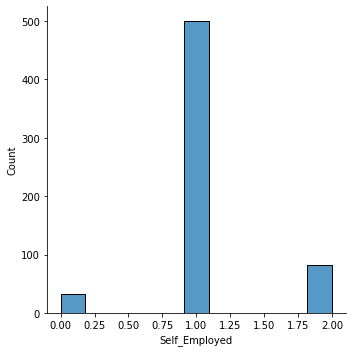

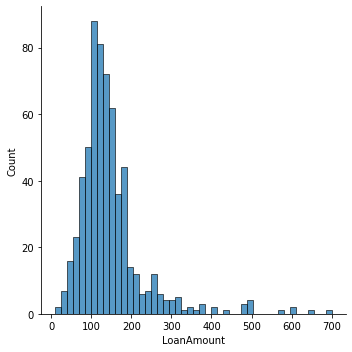

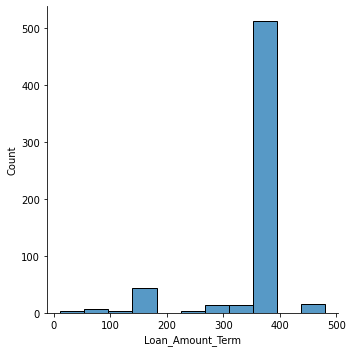

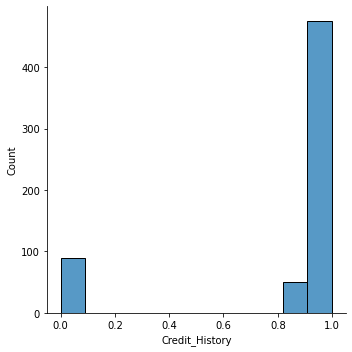

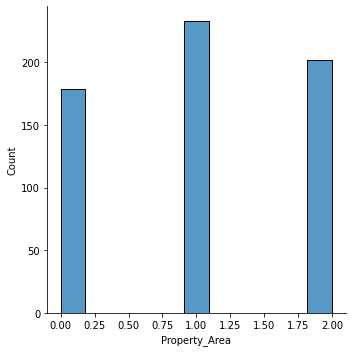

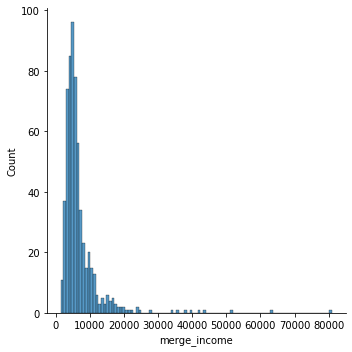

In [16]:
import seaborn as sns

for i in X.columns:
    sns.displot(X[i])

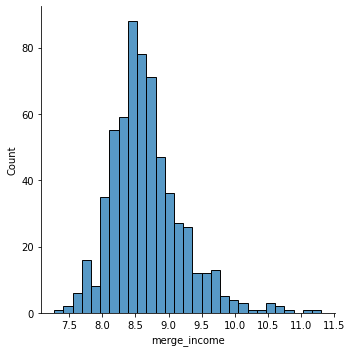

In [17]:
import numpy as np
sns.displot( np.log (X['merge_income'] ) )

In [18]:
X['merge_income'] = np.log ( X['merge_income'])
df_test['merge_income'] = np.log ( df_test['merge_income'])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.32)


In [20]:
from sklearn.preprocessing import MinMaxScaler
Sc = MinMaxScaler()
rescaledX_train = Sc.fit_transform(X_train)
rescaledX_test = Sc.fit_transform(X_test)

In [21]:
from sklearn.preprocessing import MinMaxScaler
Sc = MinMaxScaler()

rescaledX = Sc.fit_transform(X)
rescaledX_model = Sc.fit_transform(df_test)

# **Model Building**

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=0.01, max_iter= 100)
lr.fit(rescaledX_train, y_train)

y_pred_test = lr.predict(rescaledX_test)
print(lr.score(rescaledX_test, y_test))

0.7817258883248731


In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix (y_test, y_pred_test)

array([[ 27,  41],
       [  2, 127]])

In [24]:
rescaledX_model.shape

(367, 10)

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=0.001, max_iter= 100000)
lr.fit(rescaledX, y)

rescaledX_model_predicted = lr.predict(rescaledX_model)

In [26]:
temp1 = rescaledX_model_predicted

**Grid Search**

In [27]:
from sklearn.model_selection import GridSearchCV
tol = [0.01, 0.001, 0.0001, 0.1]
max_iter = [100, 150, 200, 300]

param = dict(tol= tol, max_iter = max_iter)
param

{'max_iter': [100, 150, 200, 300], 'tol': [0.01, 0.001, 0.0001, 0.1]}

In [28]:
# |best_score

In [29]:
grid_model_lr = GridSearchCV(estimator = lr, param_grid = param, cv=5)
grid_model_lr_res = grid_model_lr.fit(rescaledX, y)

best_score , best_param = grid_model_lr_res.best_score_, grid_model_lr.best_params_

In [30]:
best_param 


{'max_iter': 100, 'tol': 0.01}

In [31]:
# rescaledX_model_predicted = grid_model_lr.predict(rescaledX_model)
# rescaledX_model_predicted

**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators= 198, max_features= 9, max_depth= 8.97492985942176, min_samples_leaf= 0.12195681880940462, bootstrap= False)
rfc.fit(rescaledX_train, y_train)

y_pred_test = rfc.predict(rescaledX_test)
print(rfc.score(rescaledX_test, y_test))

0.7817258883248731


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators= 5, max_features= 9, max_depth= 8.97492985942176, min_samples_leaf= 0.12195681880940462, bootstrap= False)
rfc.fit(rescaledX, y)

rescaledX_model_predicted = rfc.predict(rescaledX_model)

**Optuna**

In [34]:
pip install "optuna"

     |████████████████████████████████| 307kB 8.0MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 174kB 30.4MB/s 
     |████████████████████████████████| 143kB 31.1MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 112kB 43.7MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11136 sha256=62f28f7896e0cf461a9b505562f7e54d75c578945af6e8768575bab4d0b03527
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [35]:
import optuna
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def objective( trial ):
      n_estimators = trial.suggest_int ( 'n_estimators', 5, 200)
      max_features = trial.suggest_int ( 'max_features', 5, 10)
      max_depth = trial.suggest_uniform ( 'max_depth', 1, 12)
      min_samples_leaf = trial.suggest_uniform( 'min_samples_leaf', 0.1, 0.5)
      bootstrap = trial.suggest_categorical ( 'bootstrap', [ True, False])

      rf = RandomForestClassifier( n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf, max_features= max_features, bootstrap= bootstrap)
      
      kf = KFold( n_splits = 3, random_state = 2000, shuffle= True)
      accuracy = []
      for train_idx, cv_idx, in kf.split( rescaledX, y):
        train_data = rescaledX[train_idx, :]
        y_train_k = y[train_idx]

        cv_data = rescaledX[cv_idx,:]
        y_testK = y[cv_idx]

        rf.fit( train_data, y_train_k)
        pred = rf.predict(cv_data);
        ac = accuracy_score( pred, y_testK)
        accuracy.append( ac);

      return np.average(accuracy)


In [36]:
study = optuna.create_study( direction= 'maximize')
study.optimize(objective, n_trials= 200)

[I 2021-07-04 07:38:48,410] A new study created in memory with name: no-name-0738893a-904c-4368-91b4-eaff6f7cf124
[I 2021-07-04 07:38:48,642] Trial 0 finished with value: 0.6872070779531324 and parameters: {'n_estimators': 58, 'max_features': 10, 'max_depth': 11.364992064762703, 'min_samples_leaf': 0.3214402856522761, 'bootstrap': False}. Best is trial 0 with value: 0.6872070779531324.
[I 2021-07-04 07:38:48,752] Trial 1 finished with value: 0.6872070779531324 and parameters: {'n_estimators': 22, 'max_features': 10, 'max_depth': 7.643323451381393, 'min_samples_leaf': 0.33362366954711475, 'bootstrap': True}. Best is trial 0 with value: 0.6872070779531324.
[I 2021-07-04 07:38:49,364] Trial 2 finished with value: 0.6872070779531324 and parameters: {'n_estimators': 134, 'max_features': 6, 'max_depth': 11.967229264035579, 'min_samples_leaf': 0.3876923010077262, 'bootstrap': True}. Best is trial 0 with value: 0.6872070779531324.
[I 2021-07-04 07:38:49,949] Trial 3 finished with value: 0.6872

In [ ]:
best_param = study.best_params
print ( best_param )

{'n_estimators': 148, 'max_features': 7, 'max_depth': 4.7791213736508285, 'min_samples_leaf': 0.120240442832897, 'bootstrap': False}


In [ ]:
rf = RandomForestClassifier(random_state = 2)
param_grid_rf ={
    'n_estimators':[25, 50, 100,200, 300],
    'max_depth':[2, 4, 6],
    'min_samples_leaf':[0.1, 0.2, 0.5, 1, 2],
}

grid_rf = GridSearchCV (estimator = rf, param_grid = param_grid_rf, cv=5)

grid_rf.fit(rescaledX, y)

best_score_r, best_params_r = grid_rf.best_score_ ,grid_rf.best_params_
best_params_r
res = []
for i in range(0, len(rescaledX_model_predicted)):
  if(rescaledX_model_predicted[i]==1):
    res.append('Y')
  else:
    res.append('N')

list_of_tuples = list(zip(test_loan_id, res))
final_table = pd.DataFrame(list_of_tuples, columns=['Loan_ID', 'Loan_Status'])
final_table=final_table[['Loan_ID', 'Loan_Status']]
# final_table
final_table = final_table.to_csv('final_table.csv', index = False)

**XGBoost**

In [ ]:
import optuna
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import xgboost as xgb

def objective( trial ):
      params = {
          'n_estimators': trial.suggest_int('n_estimators', 50, 500),
          'max_depth': trial.suggest_int('max_depth', 3, 13),
          'learning_rate': trial.suggest_uniform('learning_rate', 0.009, 0.10),
          'subsample': trial.suggest_uniform('subsample', 0.50, 1),
          'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.50, 1),
          'gamma': trial.suggest_uniform('gamma', 0, 0.5),
          'missing': -999,
      }

      clf = xgb.XGBClassifier(**params)
      
      kf = KFold( n_splits = 4, random_state = 2000, shuffle= True)
      accuracy = []
      for train_idx, cv_idx, in kf.split( rescaledX, y):
        train_data = rescaledX[train_idx, :]
        y_train_k = y[train_idx]

        cv_data = rescaledX[cv_idx,:]
        y_testK = y[cv_idx]

        clf.fit( train_data, y_train_k)
        pred = clf.predict(cv_data);
        ac = accuracy_score( pred, y_testK)
        accuracy.append( ac);

      return np.average(accuracy)

In [ ]:
study = optuna.create_study( direction= 'maximize')
study.optimize(objective, n_trials= 200)

[I 2021-07-02 14:40:20,325] A new study created in memory with name: no-name-899ed574-daed-4c55-8a5a-add9cd84112a
[I 2021-07-02 14:40:21,599] Trial 0 finished with value: 0.7717723453017571 and parameters: {'n_estimators': 455, 'max_depth': 9, 'learning_rate': 0.02433289126992562, 'subsample': 0.9310435280866649, 'colsample_bytree': 0.7088007852122946, 'gamma': 0.3946191380607639}. Best is trial 0 with value: 0.7717723453017571.
[I 2021-07-02 14:40:21,904] Trial 1 finished with value: 0.784769968593498 and parameters: {'n_estimators': 96, 'max_depth': 13, 'learning_rate': 0.06625854445986029, 'subsample': 0.7440158077334589, 'colsample_bytree': 0.8073294526519854, 'gamma': 0.17831547018595212}. Best is trial 1 with value: 0.784769968593498.
[I 2021-07-02 14:40:22,434] Trial 2 finished with value: 0.7750297088532383 and parameters: {'n_estimators': 394, 'max_depth': 4, 'learning_rate': 0.03792517389168231, 'subsample': 0.9957420994720168, 'colsample_bytree': 0.8183660650045776, 'gamma':

In [ ]:
best_param = study.best_params
print ( best_param )

{'n_estimators': 116, 'max_depth': 6, 'learning_rate': 0.009036003869695471, 'subsample': 0.7696956211835227, 'colsample_bytree': 0.6146524539080469, 'gamma': 0.19190450032342984}


In [ ]:
clf = xgb.XGBClassifier(**best_param)
res=[]
clf.fit(rescaledX, y)
rescaledX_model_predicted = clf.predict( rescaledX_model )
for i in range(0, len(rescaledX_model_predicted)):
  if(rescaledX_model_predicted[i]==1):
    res.append('Y')
  else:
    res.append('N')

list_of_tuples = list(zip(test_loan_id, res))
final_table = pd.DataFrame(list_of_tuples, columns=['Loan_ID', 'Loan_Status'])
final_table=final_table[['Loan_ID', 'Loan_Status']]
# final_table
final_table = final_table.to_csv('final_table.csv', index = False)

 **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()

nv.fit( X_train, y_train )
y_pred_test = nv.predict( X_test)
print(nv.score( X_test, y_test))

0.7817258883248731
